In [1]:
! pip install matplotlib
! pip install nibabel

In [2]:
dataRoot = '/tf/data/scans/'

# Load a Data volume

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cohort = 'c0004'
cohortPath = dataRoot + cohort + "/"

subject = 'c0004s0011t01'
subjectPath = cohortPath + subject + "/"
subjectFileRoot = subjectPath + subject

subjectOriginalFile = subjectFileRoot + ".nii.gz"
subjectResampledFile = subjectFileRoot + "_resampled.nii.gz"

In [5]:
subjectOriginal = nib.load(subjectOriginalFile).get_fdata()
subjectResampled = nib.load(subjectResampledFile).get_fdata()

# Vizualize Data Volume

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
subjectOriginal.shape

(153, 178, 189)

In [8]:
subjectResampled.shape

(256, 256, 256)

In [9]:
def draw_original(x):
    plt.imshow(subjectOriginal[:,:,x])

In [10]:
def draw_resample(x):
    plt.imshow(subjectResampled[:,:,x])

In [11]:
interact(draw_original, x=widgets.IntSlider(min=0, max=subjectOriginal.shape[2] - 1, step=1, value=subjectOriginal.shape[2]/2));
                                            


interactive(children=(IntSlider(value=94, description='x', max=188), Output()), _dom_classes=('widget-interact…

In [12]:
interact(draw_resample, x=widgets.IntSlider(min=0, max=subjectResampled.shape[2] - 1, step=1, value=subjectResampled.shape[2]/2));


interactive(children=(IntSlider(value=128, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [13]:
np.max(subjectOriginal)

13287.0

In [20]:
np.max(subjectResampled.astype('uint8'))

255

In [21]:
from PIL import Image

In [24]:
img = Image.fromarray(subjectResampled.astype('uint8')[:,:,136], mode = "L")

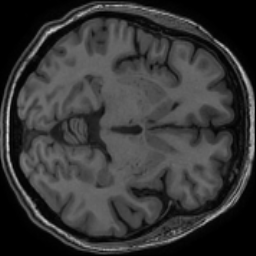

In [28]:
img

In [26]:
img.save('./test.png', "PNG")